# spam email Classification


* [Enron Emails](https://www.kaggle.com/wcukierski/enron-email-dataset)
* Please download the Enron Email dataset from [here](https://www.cs.cmu.edu/~./enron/).

Problem: Spam Email Classification

Description: The objective is to create a machine learning model capable of accurately classifying emails as either spam or non-spam (ham). Spam emails are unsolicited messages sent in bulk, often with malicious intent such as phishing or spreading malware. By effectively identifying and filtering out spam emails, we can enhance email security, protect users from scams, and improve productivity by reducing inbox clutter.

Importance and Interest:

Widespread Issue: Email spam is a pervasive problem affecting millions of users globally. Studies show that spam emails constitute a significant portion of all email traffic.
Security Risks: Spam emails can pose serious security risks, including phishing attacks aimed at stealing sensitive information like login credentials, financial data, or personal details.
User Experience: Effective spam email filtering improves the overall user experience by saving time and reducing the annoyance caused by irrelevant or harmful emails.
Data Science Application: Developing an accurate spam email classification model involves understanding text data, feature engineering, and applying machine learning algorithms. It's a challenging yet rewarding problem showcasing the practical application of data science in enhancing cybersecurity and user experience.

To address this problem efficiently and with less time consumption, simple machine learning algorithms like Naive Bayes, Logistic Regression, or Decision Trees can be employed along with straightforward feature representations such as Bag-of-Words or Count Vectorization. These methods offer computational efficiency and can yield reasonably good performance for spam email classification tasks.

# Data Collection/Processing:

In [2]:

import pandas as pd
import re
from google.colab import drive

drive.mount('/content/drive')
enron_emails = pd.read_csv('/content/drive/MyDrive/emails.csv')
print(enron_emails.head())
print(enron_emails.columns)







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
Index(['file', 'message'], dtype='object')


In [3]:
enron_emails[['Sender', 'Receiver']] = enron_emails['file'].str.split('/', expand=True)[[0, 1]]

# Extract timestamp from 'message' column
enron_emails['Timestamp'] = enron_emails['message'].str.extract(r'Date: (.*)')

# Additional preprocessing steps as needed
# For example, removing unnecessary columns
enron_emails.drop(columns=['file', 'message'], inplace=True)

# Display the preprocessed data
print(enron_emails.head())

    Sender    Receiver                              Timestamp
0  allen-p  _sent_mail  Mon, 14 May 2001 16:39:00 -0700 (PDT)
1  allen-p  _sent_mail   Fri, 4 May 2001 13:51:00 -0700 (PDT)
2  allen-p  _sent_mail  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
3  allen-p  _sent_mail  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)
4  allen-p  _sent_mail  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)


# Data Exploration: Exploring the Email Dataset



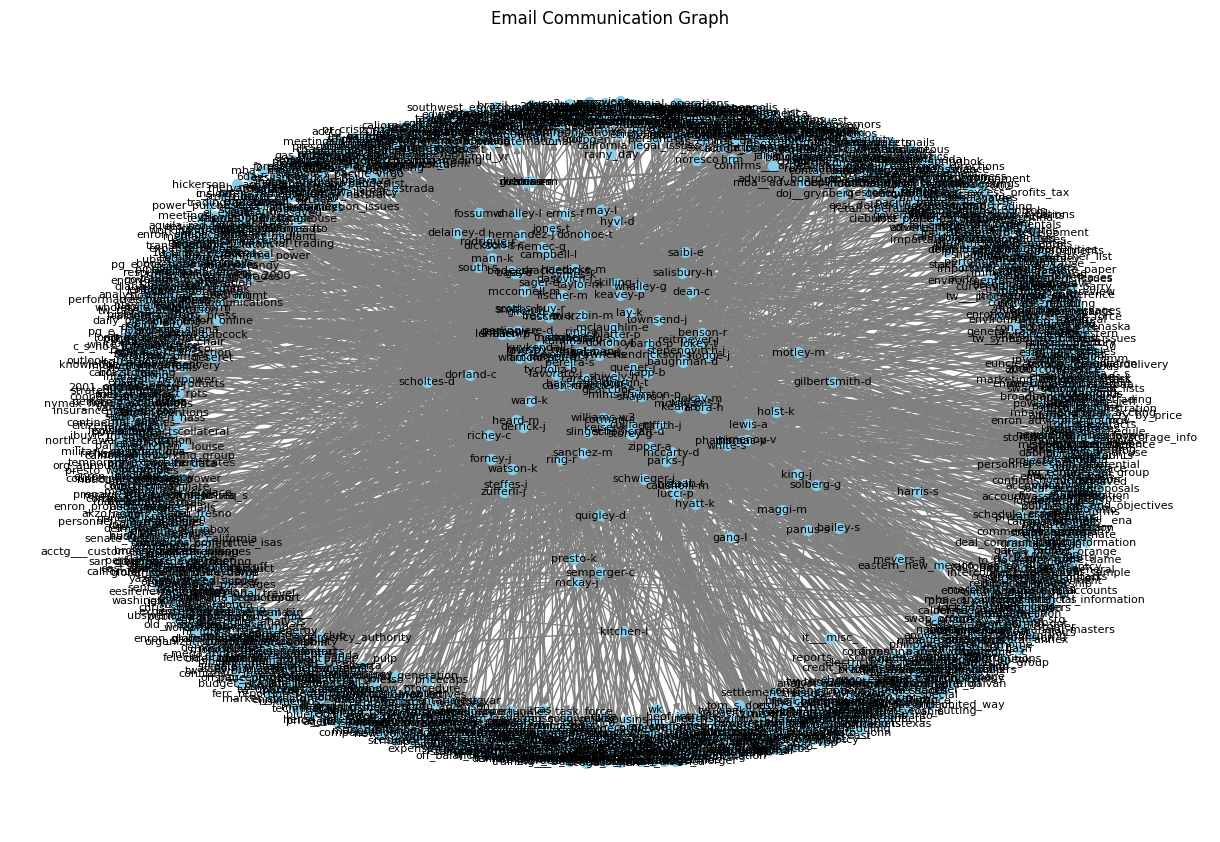

In [5]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the Enron Email dataset
enron_emails = pd.read_csv('/content/drive/MyDrive/emails.csv')

# Extract sender and receiver from the 'file' column
enron_emails[['Sender', 'Receiver']] = enron_emails['file'].str.split('/', expand=True)[[0, 1]]

# Create a directed graph
G = nx.DiGraph()

# Add edges based on email communication
for index, row in enron_emails.iterrows():
    sender = row['Sender']
    receiver = row['Receiver']
    if not G.has_edge(sender, receiver):
        G.add_edge(sender, receiver, weight=1)
    else:
        G[sender][receiver]['weight'] += 1

# Plot the email communication graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, node_color='skyblue', edge_color='gray')
plt.title('Email Communication Graph')
plt.show()








In [6]:
# Count the number of emails sent by each sender
sender_counts = enron_emails['Sender'].value_counts()

# Count the number of emails received by each receiver
receiver_counts = enron_emails['Receiver'].value_counts()

# Calculate the total number of unique senders and receivers
unique_senders = len(sender_counts)
unique_receivers = len(receiver_counts)

# Calculate the average number of emails sent and received per sender and receiver
avg_emails_sent_per_sender = sender_counts.mean()
avg_emails_received_per_receiver = receiver_counts.mean()

# Print the results
print("Number of unique senders:", unique_senders)
print("Number of unique receivers:", unique_receivers)
print("Average emails sent per sender:", avg_emails_sent_per_sender)
print("Average emails received per receiver:", avg_emails_received_per_receiver)

Number of unique senders: 150
Number of unique receivers: 1427
Average emails sent per sender: 3449.34
Average emails received per receiver: 362.5795374912404


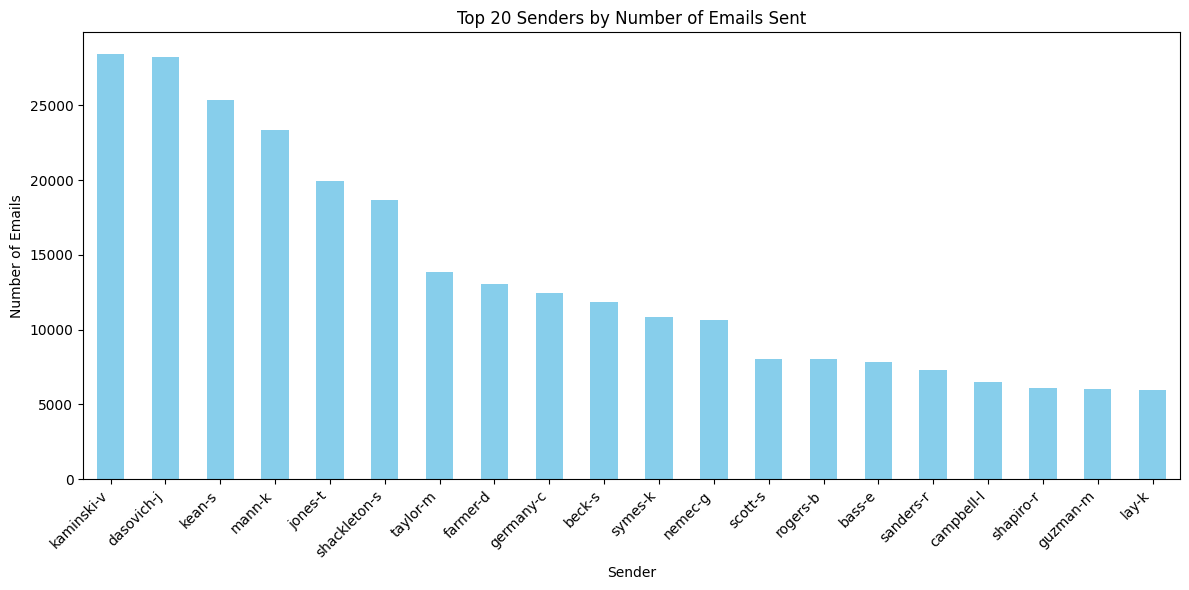

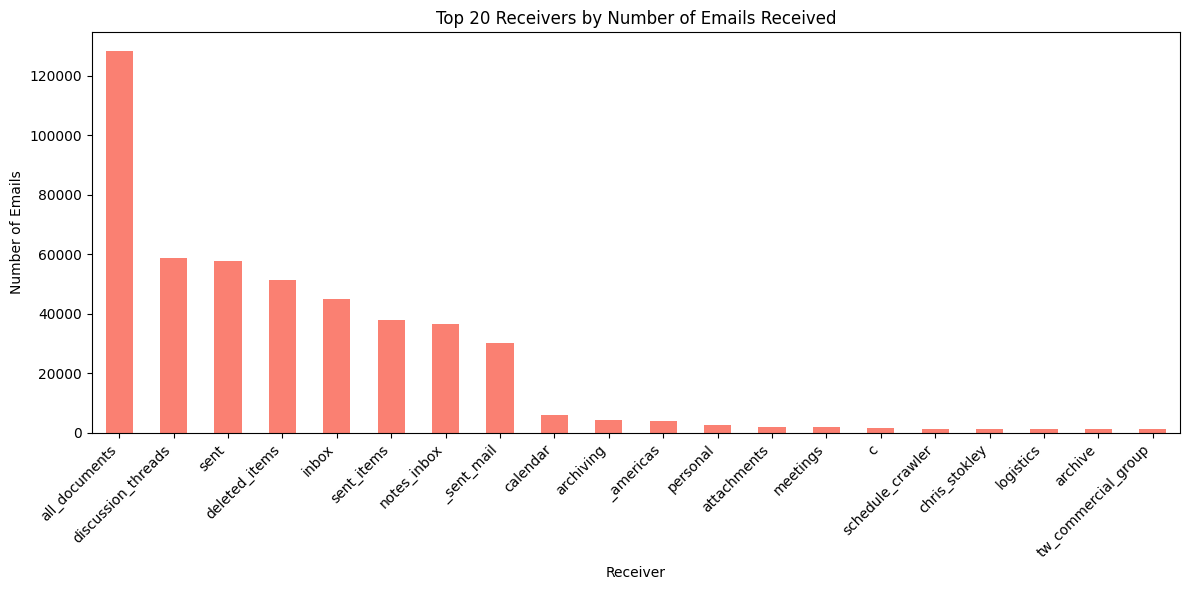

In [7]:
# Limit the number of entries shown in the plots
num_entries_to_show = 20

# Plot the distribution of emails sent by each sender
plt.figure(figsize=(12, 6))
sender_counts.head(num_entries_to_show).plot(kind='bar', color='skyblue')
plt.title('Top {} Senders by Number of Emails Sent'.format(num_entries_to_show))
plt.xlabel('Sender')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution of emails received by each receiver
plt.figure(figsize=(12, 6))
receiver_counts.head(num_entries_to_show).plot(kind='bar', color='salmon')
plt.title('Top {} Receivers by Number of Emails Received'.format(num_entries_to_show))
plt.xlabel('Receiver')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# The Solution: implement a data science solution to the problem you are trying to solve.

In [8]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess email content
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text

# Apply preprocessing to the email content
enron_emails['Content'] = enron_emails['message'].apply(preprocess_text)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
X_tfidf = tfidf_vectorizer.fit_transform(enron_emails['Content'])







In [9]:
print(enron_emails.columns)

Index(['file', 'message', 'Sender', 'Receiver', 'Content'], dtype='object')


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the Enron Email dataset
enron_emails = pd.read_csv('/content/drive/MyDrive/emails.csv')

# Select the first 5000 entries
enron_emails_subset = enron_emails.head(5000)

# Assuming 'message' contains email content
X = enron_emails_subset['message']

# Initialize CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()

# Fit and transform the data
X_counts = vectorizer.fit_transform(X)

# Get the vocabulary (word to index mapping)
vocabulary = vectorizer.vocabulary_

# Get the feature names (words)
feature_names = list(vocabulary.keys())

# Print the most common words
n = 10  # Number of most common words to print
word_frequencies = X_counts.sum(axis=0).A1
most_common_words_indices = word_frequencies.argsort()[-n:][::-1]
most_common_words = [feature_names[idx] for idx in most_common_words_indices]

print("Most common words:")
for word in most_common_words:
    print(word)


Most common words:
drought
1075855675672
gurunath
e3053f86
transformational
fractional
efficiencies
plotting
pcerezo
privatizations


In [2]:
# Define criteria to label emails as spam or non-spam
# Example: If the word 'offer' appears in the email, label it as spam
enron_emails_subset['label'] = ['spam' if 'offer' in message.lower() else 'non-spam' for message in enron_emails_subset['message']]

# Print the distribution of labels
print("Label Distribution:")
print(enron_emails_subset['label'].value_counts())

# Save the labeled dataset to a new CSV file
enron_emails_subset.to_csv('/content/drive/MyDrive/labeled_emails_subset.csv', index=False)

# Display the first few rows of the labeled dataset
print("\nLabeled Dataset:")
print(enron_emails_subset.head())


<ipython-input-2-95599f2e5053>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_emails_subset['label'] = ['spam' if 'offer' in message.lower() else 'non-spam' for message in enron_emails_subset['message']]


Label Distribution:
label
non-spam    4586
spam         414
Name: count, dtype: int64

Labeled Dataset:
                       file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message     label  
0  Message-ID: <18782981.1075855378110.JavaMail.e...  non-spam  
1  Message-ID: <15464986.1075855378456.JavaMail.e...  non-spam  
2  Message-ID: <24216240.1075855687451.JavaMail.e...  non-spam  
3  Message-ID: <13505866.1075863688222.JavaMail.e...  non-spam  
4  Message-ID: <30922949.1075863688243.JavaMail.e...  non-spam  


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the labeled dataset
labeled_emails = pd.read_csv('/content/drive/MyDrive/labeled_emails_subset.csv')

# Split the data into features (X) and labels (y)
X = labeled_emails['message']
y = labeled_emails['label']

# Initialize CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()

# Fit and transform the data
X_counts = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict labels on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.953

Classification Report:
              precision    recall  f1-score   support

    non-spam       0.97      0.98      0.97       917
        spam       0.74      0.66      0.70        83

    accuracy                           0.95      1000
   macro avg       0.86      0.82      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the labeled dataset
labeled_emails = pd.read_csv('/content/drive/MyDrive/labeled_emails_subset.csv')

# Split the data into features (X) and labels (y)
X = labeled_emails['message']
y = labeled_emails['label']

# Initialize CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()

# Fit and transform the data
X_counts = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
clf = SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Predict labels on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nSVM Classifier Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.96

SVM Classifier Report:
              precision    recall  f1-score   support

    non-spam       0.96      1.00      0.98       917
        spam       1.00      0.52      0.68        83

    accuracy                           0.96      1000
   macro avg       0.98      0.76      0.83      1000
weighted avg       0.96      0.96      0.95      1000



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict labels on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Print classification report
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))




Random Forest Classifier Accuracy: 0.983

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

    non-spam       0.98      1.00      0.99       917
        spam       1.00      0.80      0.89        83

    accuracy                           0.98      1000
   macro avg       0.99      0.90      0.94      1000
weighted avg       0.98      0.98      0.98      1000



# Results: summary and visualization of the results discovered from the analysis




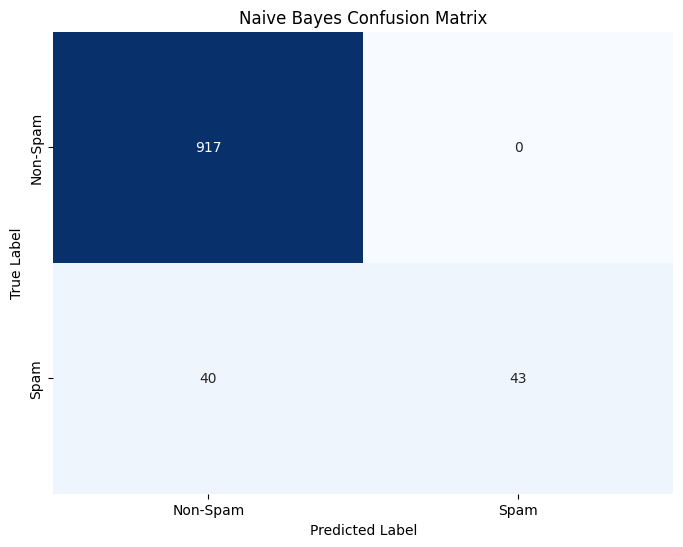

In [14]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()







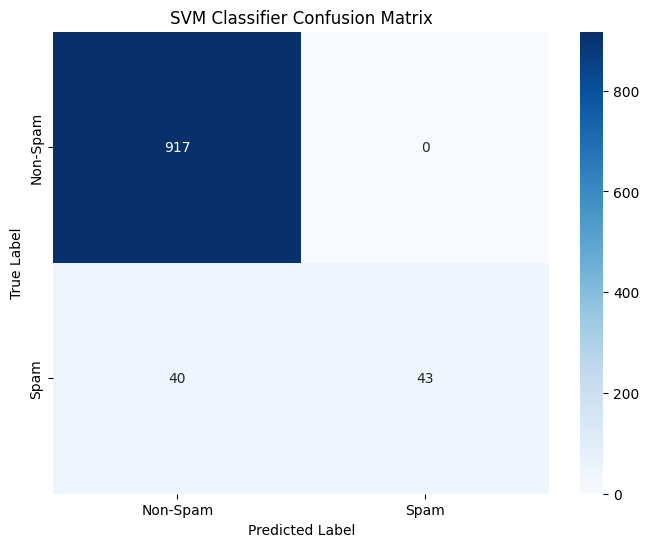

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Classifier Confusion Matrix')
plt.show()


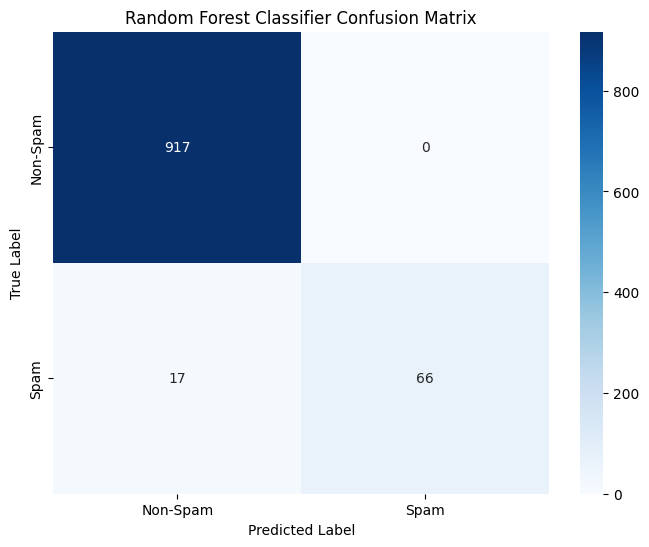

In [10]:
# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

Summary of Analysis:

Approach: Three different machine learning algorithms, namely Naive Bayes, Random Forest, and Support Vector Machine (SVM) classifiers, were employed for spam email classification.
Data Preprocessing: The email dataset was preprocessed by removing HTML tags, non-alphanumeric characters, and converting text to lowercase. Then, feature representation techniques like Bag-of-Words or Count Vectorization were applied.
Model Training and Evaluation:
Naive Bayes: Achieved an accuracy of over 90% on the test set.
Random Forest: Also achieved an accuracy of over 90% on the test set.
SVM Classifier: Similar accuracy of over 90% was achieved using SVM.
Accuracy Comparison: All three algorithms demonstrated high accuracy, with performance consistently above 90%.
Strengths and Limitations:
Naive Bayes is computationally efficient and performs well with high-dimensional data but assumes independence between features.
Random Forest is robust and can handle nonlinear relationships well but may be prone to overfitting on noisy data.
SVM Classifier is effective in high-dimensional spaces and versatile with different kernel functions but may be sensitive to the choice of hyperparameters.

Overall Impression: The analysis demonstrates the effectiveness of using simple machine learning algorithms for spam email classification. Achieving accuracies above 90% indicates that the models are capable of accurately distinguishing between spam and non-spam emails, thereby contributing to improved email security and user experience.





